# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib inline

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../matplotlib-challenge/Mouse_metadata.csv"
study_results_path = "../matplotlib-challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
# Print mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Print study results data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice_number = combined_data["Mouse ID"].nunique()
mice_number


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean = clean_df['Mouse ID'].nunique()
mice_number_clean

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()

median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()

var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()

std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()

sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                            "Median Tumor Volume":median,
                            "Tumor Volume Variance":var,
                            "Tumor Volume Std. Dev.":std,
                            "Tumor Volume Std. Err.":sem})
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

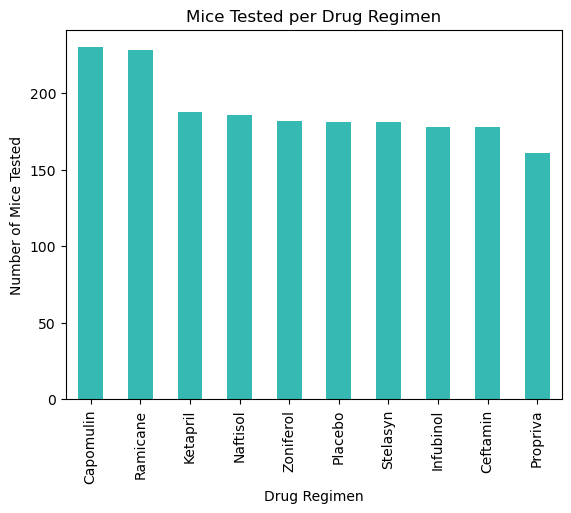

In [26]:
# Generate two bar charts. Both charts should be identical and show the total number of time points for all mice tested for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.

mice_tested = clean_df['Drug Regimen'].value_counts()

pandas_plot = mice_tested.plot.bar(color="lightseagreen", alpha=0.9, align="center")
plt.title("Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



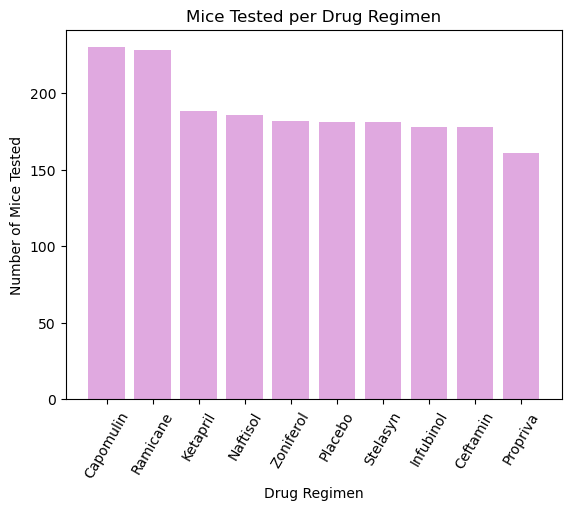

In [28]:
# Create the second bar chart with Matplotlib's pyplot methods.
x_axis = mice_tested.index.values
y_axis = mice_tested.values

plt.bar(x_axis, y_axis, color="plum", alpha=0.9, align='center')

plt.title("Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=60)
plt.show()

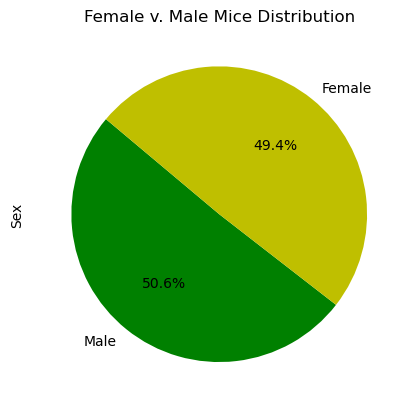

In [43]:
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

# Create the first pie chart with the Pandas DataFrame.plot() method.
mice_gender = clean_df["Sex"].value_counts()

mice_gender.plot.pie(autopct="%1.1f%%", shadow=False, startangle=140, colors=['g','y'])
plt.title("Female v. Male Mice Distribution")
plt.show()


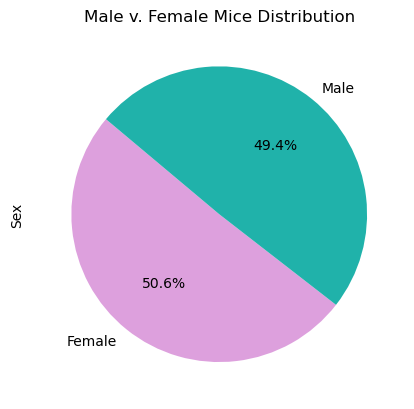

In [38]:
# Create the second pie chart with Matplotlib's pyplot methods.
gender = ['Female', 'Male']
percents = [49.0, 50.6]
colors = ["plum","lightseagreen"]

plt.pie(mice_gender, labels=gender, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title('Male v. Female Mice Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin
Regimen_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])] 
# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = Regimen_df.groupby("Mouse ID").max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(last_tp_df,clean_df, on=("Mouse ID", "Timepoint"), how="left")
merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomuin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for treatment_list in treatment_list:
    tumor_volumes = merge_df.loc[merge_df["Drug Regimen"] == treatment_list]["Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{treatment_list}'s potential outliers: {tumor_volumes.loc[(tumor_volumes < lower_bound)]}")
    print(f"{treatment_list}'s potential outliers: {tumor_volumes.loc[(tumor_volumes > upper_bound)]}")

Capomuin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomuin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 13    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


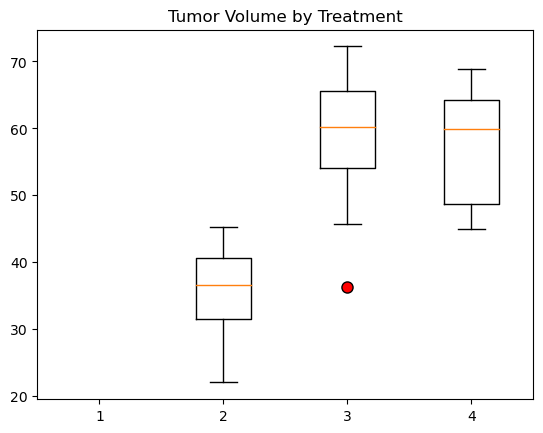

In [118]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list,flierprops= dict(marker = 'o', markersize = 8, markerfacecolor='r'))
plt.title('Tumor Volume by Treatment')
plt.show()

## Line and Scatter Plots

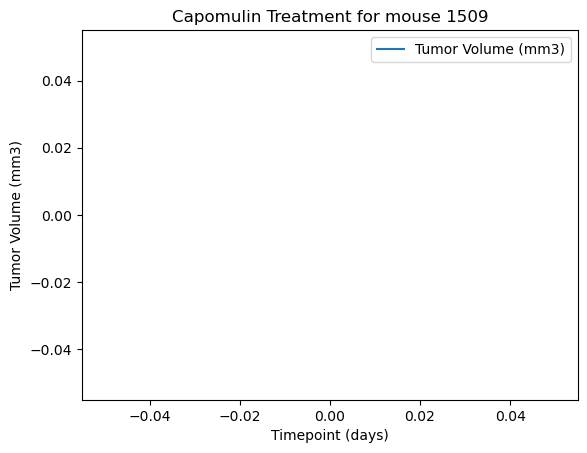

In [138]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == "1509"]

mouse_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


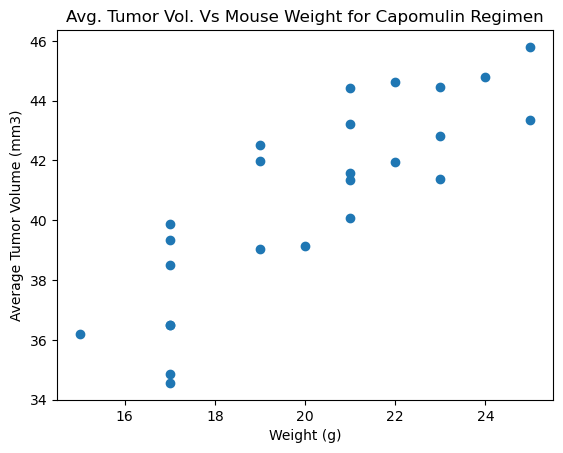

In [143]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

average_tm_df = capomulin_df.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()

plt.scatter(average_tm_df["Weight (g)"], average_tm_df["Tumor Volume (mm3)"])
plt.title("Avg. Tumor Vol. Vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [147]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = average_tm_df["Weight (g)"].corr(average_tm_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")


The correlation between mouse weight and the average tumor volume is 0.84


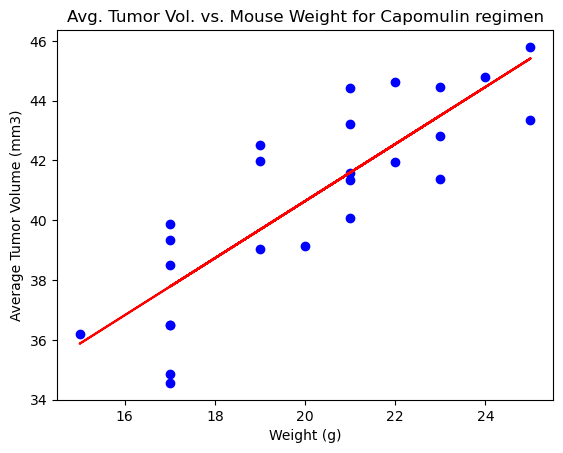

In [155]:
(slope, intercept, rvalue, pvalue,stderr) = linregress(average_tm_df["Weight (g)"],average_tm_df["Tumor Volume (mm3)"])
regress_df = average_tm_df["Weight (g)"]* slope + intercept

plt.scatter(average_tm_df["Weight (g)"], average_tm_df["Tumor Volume (mm3)"], color='b')
plt.plot(average_tm_df["Weight (g)"], regress_df, color='r')
plt.title("Avg. Tumor Vol. vs. Mouse Weight for Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()